<a href="https://www.kaggle.com/code/jiprud/tps-apr22-rookie-eda?scriptVersionId=91988380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10) # make plots a bit bigger

# Load Data

In [2]:
train_df = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv')
train_labels_df = pd.read_csv('../input/tabular-playground-series-apr-2022/train_labels.csv')

In [3]:
# add target information (from train_labels) into training dataframe
train_df = train_df.merge(train_labels_df,how='outer')

# Explore

In [4]:
display(train_df.head())
display(test_df.head())

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


In [5]:
train_df.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,1.298350e+04,3.316331e+02,2.950000e+01,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02,5.011553e-01
std,7.496318e+03,1.958257e+02,1.731811e+01,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01,4.999988e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02,0.000000e+00
25%,6.491750e+03,1.617500e+02,1.475000e+01,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01,0.000000e+00
50%,1.298350e+04,3.350000e+02,2.950000e+01,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00,1.000000e+00
75%,1.947525e+04,5.010000e+02,4.425000e+01,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01,1.000000e+00
max,2.596700e+04,6.710000e+02,5.900000e+01,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02,1.000000e+00


* sequence - a unique id for each sequence
* subject - a unique id for the subject in the experiment
* step - time step of the recording, in one second intervals

Lets see how many unique values we have for each category

In [6]:
train_df[['sequence', 'subject','step']].nunique()

sequence    25968
subject       672
step           60
dtype: int64

In [7]:
test_df[['sequence', 'subject','step']].nunique()

sequence    12218
subject       319
step           60
dtype: int64

Do we have the same subjects in train and test?

In [8]:
len(np.intersect1d(train_df['subject'],test_df['subject']))

0

No, the test dataframe contains only new subjects.

Let's draw sensor values for one (randomly selected) sequence.

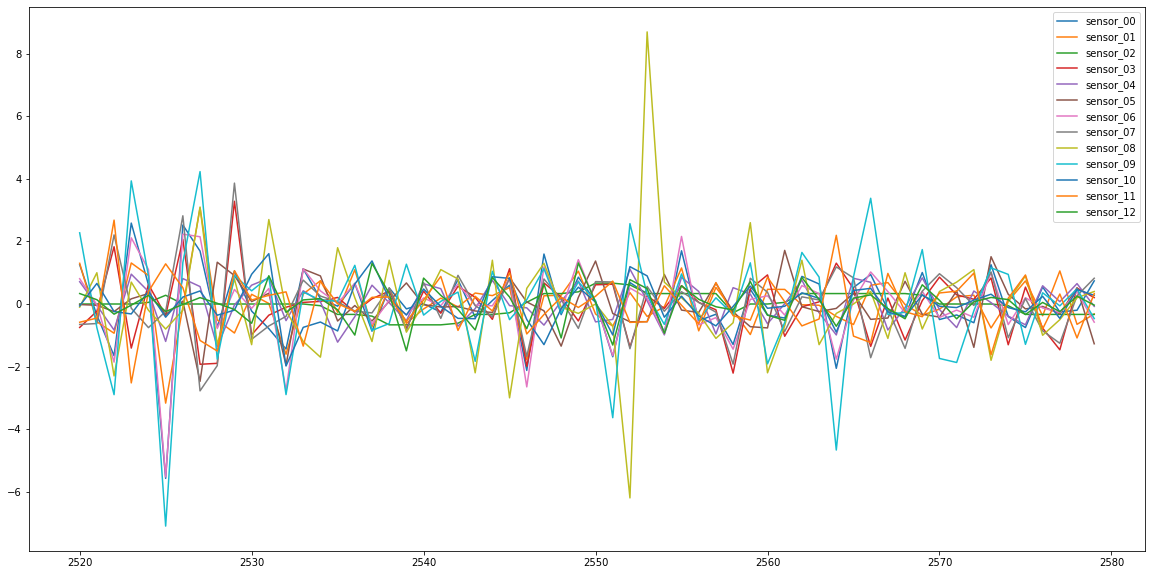

In [9]:
sequence = 42
seq = train_df.query('sequence == @sequence').copy()

seq.drop(['sequence','subject','step','state'], axis=1).plot();

## Mean Values

Let's look closer to mean values of sensors across the whole sequence. Are the means different for the two states?

In [10]:
means = train_df.groupby('state').mean()
display(means)
display(means.diff()) # difference between state 0 and 1

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
state,,,,,,,,,,,,,,,,
0,13037.979929,336.688976,29.5,0.001164,0.000507,-0.401858,-0.001932,-0.008240,-0.001226,0.001782,-0.000370,-0.002203,0.001976,-0.004222,-0.002899,-0.03523
1,12929.271246,326.600507,29.5,-0.000287,-0.002570,-0.034600,-0.002380,0.004553,-0.002076,-0.002597,0.000316,0.001934,0.000758,0.004864,-0.004564,0.01167


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
state,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-108.708683,-10.088469,0.0,-0.001451,-0.003078,0.367259,-0.000448,0.012793,-0.00085,-0.004379,0.000686,0.004137,-0.001218,0.009086,-0.001664,0.0469


Yes, there is some difference in mean values for the two states.
Are the differences significant? Can we use this information for a model? Let's try...

# Engineer Features

In [11]:
def create_features(df):
    df_copy = df.copy()
    # inspired by: https://www.kaggle.com/code/hasanbasriakcay/tpsapr22-fe-pseudo-labels-baseline
    df_copy['sensor_02_num'] = df_copy['sensor_02'] > -15
    df_copy['sensor_02_num'] = df_copy['sensor_02'].astype(int)
    df_copy['sensor_sum1'] = (df_copy['sensor_00'] + df_copy['sensor_09'] + df_copy['sensor_06'] + df_copy['sensor_01'])
    df_copy['sensor_sum2'] = (df_copy['sensor_01'] + df_copy['sensor_11'] + df_copy['sensor_09'] + df_copy['sensor_06'] + df_copy['sensor_00'])
    df_copy['sensor_sum3'] = (df_copy['sensor_03'] + df_copy['sensor_11'] + df_copy['sensor_07'])
    df_copy['sensor_sum4'] = (df_copy['sensor_04'] + df_copy['sensor_10'])
    
    out_df = df_copy.groupby('sequence').agg(['mean', 'max', 'min', 'var', 'mad', 'sum', 'median','skew'])
#     out_df = df_copy.groupby('sequence').agg(['mean','max'])
    out_df.columns = ['_'.join(col).strip() for col in out_df.columns]

    return out_df

# Model



## Prepare training and testing dataframes

In [12]:
%%time
train = train_df.drop(['subject', 'step', 'state'], axis=1)
X_train = create_features(train)
test = test_df.drop(['subject', 'step'], axis=1)
X_test = create_features(test)
y_train = train_labels_df['state']

submission = pd.DataFrame(index = X_test.index)

display(X_train,X_test,y_train)

,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,sensor_00_skew,sensor_01_mean,sensor_01_max,...,sensor_sum3_median,sensor_sum3_skew,sensor_sum4_mean,sensor_sum4_max,sensor_sum4_min,sensor_sum4_var,sensor_sum4_mad,sensor_sum4_sum,sensor_sum4_median,sensor_sum4_skew
sequence,,,,,,,,,,,,,,,,,,,,,
0,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,1.488052,-0.013025,3.623950,...,0.036826,1.554928,-0.069849,2.347293,-2.773813,1.682649,1.134811,-4.190936,-0.047594,-0.131429
1,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,-0.683454,-0.019958,2.525210,...,-0.104640,0.238918,0.474564,13.617388,-3.336436,5.453356,1.423124,28.473850,0.367173,3.074396
2,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,0.122688,0.025000,2.321429,...,0.272682,-0.014693,-0.155560,13.756883,-17.180416,16.280036,2.018672,-9.333572,-0.235286,-1.094369
3,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,0.306005,-0.049177,6.722689,...,0.078909,-0.194510,-0.000629,1.891419,-1.437052,0.274061,0.358683,-0.037732,-0.003578,0.302740
4,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,-0.216130,0.014916,3.532563,...,0.692742,-0.492466,0.003641,1.938292,-1.696118,0.725099,0.738409,0.218480,0.065210,-0.036927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,0.100773,3.974498,-3.738022,2.395765,1.166378,6.046368,0.193586,0.069687,0.007073,4.161765,...,0.307365,0.904466,-0.006111,1.095872,-1.159665,0.140706,0.273931,-0.366663,0.012400,-0.217080
25964,0.017182,2.927357,-5.220247,1.112449,0.646433,1.030912,0.051777,-1.690229,0.004814,2.758403,...,-0.003706,0.068684,-0.040302,3.338091,-2.862597,3.208284,1.576838,-2.418094,-0.569331,0.398616
25965,-0.006466,2.818393,-3.422720,1.506580,0.952644,-0.387944,-0.039413,-0.142272,0.004447,3.826681,...,-0.516696,0.328535,0.113493,5.700021,-7.723203,9.344902,2.517856,6.809584,0.381648,-0.276833


,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,sensor_00_skew,sensor_01_mean,sensor_01_max,...,sensor_sum3_median,sensor_sum3_skew,sensor_sum4_mean,sensor_sum4_max,sensor_sum4_min,sensor_sum4_var,sensor_sum4_mad,sensor_sum4_sum,sensor_sum4_median,sensor_sum4_skew
sequence,,,,,,,,,,,,,,,,,,,,,
25968,-0.002602,3.146832,-4.950541,1.191898,0.732741,-0.156105,-0.002318,-0.927921,-0.036432,19.639706,...,0.202880,-0.360814,0.090988,5.697107,-2.963021,1.983799,1.045196,5.459259,0.014668,0.876741
25969,0.028516,5.816074,-3.675425,2.102617,0.848916,1.710974,-0.015842,1.644888,0.002276,1.763655,...,0.063919,0.550755,0.057468,2.832973,-1.616756,0.970701,0.833534,3.448065,-0.063218,0.342816
25970,0.057664,12.306028,-15.005410,25.843168,4.023308,3.459815,1.079212,-0.634247,-0.021796,5.900210,...,-0.356183,0.048026,-0.071148,2.865346,-3.444068,2.778538,1.438519,-4.268900,-0.039926,-0.158999
25971,-0.004791,2.876352,-2.465997,0.837073,0.687991,-0.287481,-0.033617,0.218435,0.014863,2.435924,...,-0.312183,0.246738,0.064396,4.631807,-2.053887,1.004781,0.672005,3.863747,0.017735,1.813843
25972,-0.001443,17.295209,-9.974498,7.748900,1.083572,-0.086553,-0.171947,3.383219,-0.025350,115.925420,...,0.100849,3.534993,0.002218,4.625789,-7.731151,4.892391,1.708490,0.133087,-0.016838,-0.527340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,-0.047746,5.135240,-3.358578,1.222327,0.673399,-2.864760,-0.101236,1.537281,-0.029289,2.111345,...,-0.102967,0.651115,-0.815449,19.741671,-25.115458,115.218817,9.295839,-48.926915,-1.021047,-0.010955
38182,-0.016473,26.738794,-13.154560,20.253989,1.734531,-0.988408,-0.020866,2.817622,-0.023547,32.420168,...,-0.178371,-1.329641,-0.234077,5.648812,-8.197249,3.911593,1.429976,-14.044601,-0.014485,-0.773781
38183,-0.005500,8.312983,-4.977589,4.338781,1.264870,-0.329985,-0.093895,1.434987,0.039653,1.739496,...,-0.024697,1.525003,0.005812,1.203590,-1.341115,0.343201,0.488247,0.348750,0.013070,-0.036736


0        0
1        1
2        1
3        1
4        1
        ..
25963    1
25964    0
25965    1
25966    1
25967    0
Name: state, Length: 25968, dtype: int64

CPU times: user 5min 37s, sys: 702 ms, total: 5min 37s
Wall time: 5min 37s


## Gradient Boosting

In [13]:
%%time
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state = 2)

model_xgb.fit(X_train,y_train);

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 1min 32s, sys: 478 ms, total: 1min 32s
Wall time: 24.5 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
y_xgb = model_xgb.predict(X_test)

#display(y_xgb)
#submission['xgb'] = y_xgb

y_xgb_proba = model_xgb.predict_proba(X_test)
display(y_xgb_proba)
#submission['xgb_proba_0'] = y_xgb_proba[:,0]
submission['xgb_proba_1'] = y_xgb_proba[:,1]

array([[0.06050509, 0.9394949 ],
       [0.05761045, 0.94238955],
       [0.99459594, 0.00540407],
       ...,
       [0.10710675, 0.89289325],
       [0.9961219 , 0.00387809],
       [0.9390381 , 0.06096188]], dtype=float32)

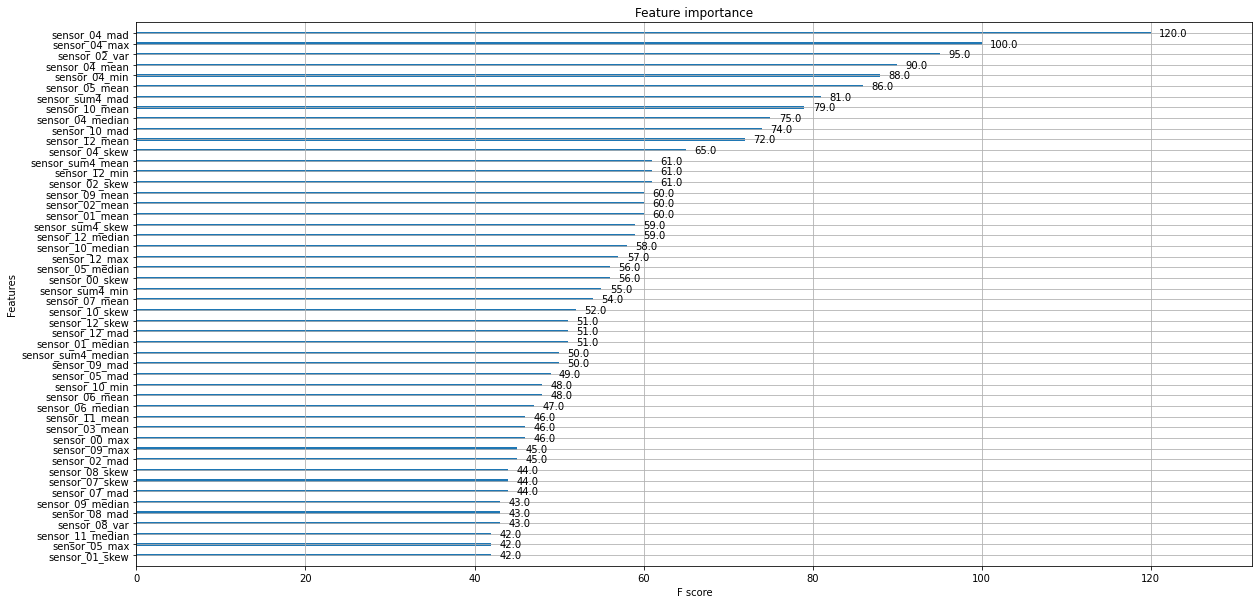

In [15]:
# show feature importance
from xgboost import plot_importance
plot_importance(model_xgb, max_num_features = 50)
plt.show()


In [16]:
feature_importance = model_xgb.get_booster().get_score()

feature_importance

{'sensor_00_mean': 38.0,
 'sensor_00_max': 46.0,
 'sensor_00_min': 26.0,
 'sensor_00_var': 16.0,
 'sensor_00_mad': 30.0,
 'sensor_00_median': 39.0,
 'sensor_00_skew': 56.0,
 'sensor_01_mean': 60.0,
 'sensor_01_max': 26.0,
 'sensor_01_min': 24.0,
 'sensor_01_var': 17.0,
 'sensor_01_mad': 30.0,
 'sensor_01_median': 51.0,
 'sensor_01_skew': 42.0,
 'sensor_02_mean': 60.0,
 'sensor_02_max': 27.0,
 'sensor_02_min': 23.0,
 'sensor_02_var': 95.0,
 'sensor_02_mad': 45.0,
 'sensor_02_median': 14.0,
 'sensor_02_skew': 61.0,
 'sensor_03_mean': 46.0,
 'sensor_03_max': 27.0,
 'sensor_03_min': 18.0,
 'sensor_03_var': 14.0,
 'sensor_03_mad': 24.0,
 'sensor_03_median': 38.0,
 'sensor_03_skew': 37.0,
 'sensor_04_mean': 90.0,
 'sensor_04_max': 100.0,
 'sensor_04_min': 88.0,
 'sensor_04_var': 32.0,
 'sensor_04_mad': 120.0,
 'sensor_04_median': 75.0,
 'sensor_04_skew': 65.0,
 'sensor_05_mean': 86.0,
 'sensor_05_max': 42.0,
 'sensor_05_min': 34.0,
 'sensor_05_var': 33.0,
 'sensor_05_mad': 49.0,
 'sensor_05_

## Create Submission file

In [17]:
submission.to_csv('submission.csv',columns=['xgb_proba_1'], header=['state'],index=True)